https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/

In [143]:

import pandas as pd
from fbprophet import Prophet
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [17]:
df = pd.read_csv('../DashApp/data/stockdata2.csv', index_col=0, parse_dates=True)
df.index = pd.to_datetime(df['Date'])

In [18]:
df.head()

,Date,stock,value,change
Date,,,,
2007-01-03,2007-01-03,MSFT,23.950705,-0.167452
2007-01-03,2007-01-03,IBM,80.517962,1.069189
2007-01-03,2007-01-03,SBUX,16.149666,0.113476
2007-01-03,2007-01-03,AAPL,11.086612,2.219569
2007-01-03,2007-01-03,GSPC,1416.599976,0.122829


In [81]:
df_sub = df.copy()
stock = "AAPL"
x=df_sub[df_sub['stock'] == stock].index,
y=df_sub[df_sub['stock'] == stock][['Date','value']]
y.columns = ["ds","y"]
y["ds"] = pd.to_datetime(y["ds"])

In [82]:
model1=Prophet(interval_width=0.95) 

m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(y)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


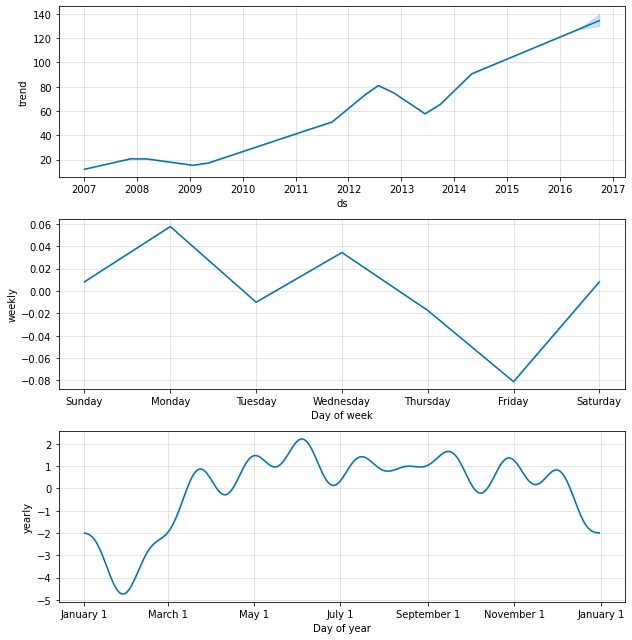

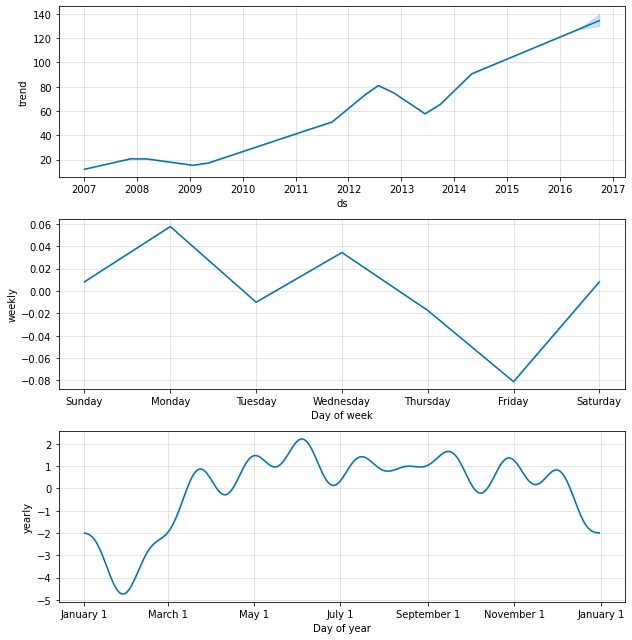

In [83]:
m.plot_components(forecast)

<AxesSubplot:xlabel='ds'>

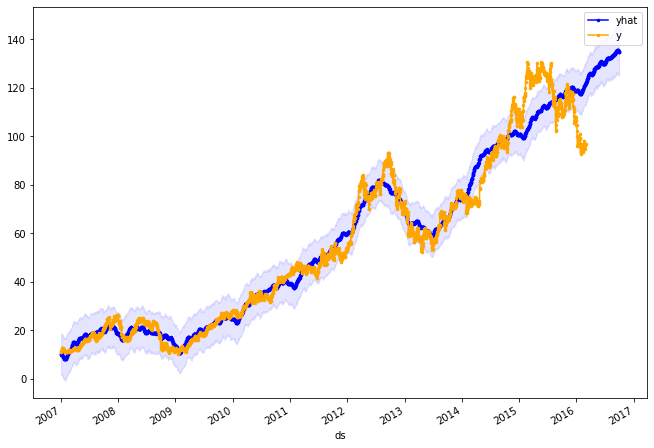

In [127]:
fig,ax = plt.subplots()
fig.set_size_inches(11,8)

ax.fill_between(forecast.ds, (forecast.yhat_lower), (forecast.yhat_upper), color='b', alpha=.1)

forecast.plot(x="ds",y="yhat",ax=ax,style=".",markersize="5",linestyle="-",color='b')
y.plot(x="ds",y="y",ax=ax,style='.',color="orange",linestyle="-",markersize="5")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


<AxesSubplot:xlabel='ds'>

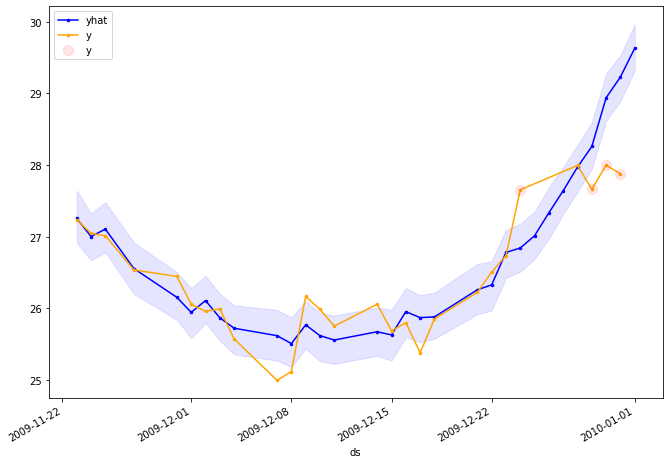

In [257]:
# Do it piece wise and predict anomalies
    
# settings
delta_test = 10
delta_train = 40
curr_date = pd.to_datetime("2010-01-01")

# generate dates
maxcut_date = curr_date - timedelta(days=delta_test)
mincut_date = curr_date - timedelta(days=delta_train)

# generate train data
ys = y[(y.ds <= maxcut_date) & (y.ds >= mincut_date)]

# generate pred dates
future_dates = pd.DataFrame({"ds":[curr_date - timedelta(days=i) for i in range(delta_test)]})
future_dates.sort_values("ds",inplace=True)
future_dates.index = future_dates.ds
pred_dates = pd.concat([ys[["ds"]],future_dates],axis=0)



model1=Prophet(interval_width=0.95) 
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)

m.fit(ys)
#future = m.make_future_dataframe(periods=delta_test)
forecast = m.predict(pred_dates)

# find outlier
dfj =  pd.merge(left=forecast,right=y,on="ds")
dfj_cut = dfj[(dfj.ds > maxcut_date) & (dfj.ds <= curr_date)]
df_outlier = dfj_cut[(dfj_cut.y <dfj_cut.yhat_lower) | (dfj_cut.y > dfj_cut.yhat_upper)]



# Plots
fig,ax = plt.subplots()
fig.set_size_inches(11,8)

ax.fill_between(forecast.ds, (forecast.yhat_lower), (forecast.yhat_upper), color='b', alpha=.1)
forecast.plot(x="ds",y="yhat",ax=ax,style=".",markersize="5",linestyle="-",color='b')
y[(y.ds<curr_date) & (y.ds>mincut_date)].plot(x="ds",y="y",ax=ax,style='.',color="orange",linestyle="-",markersize="5")
df_outlier.plot(x="ds",y="y",ax=ax,style="o",color=[1,0,0],alpha=0.2,markersize="10")



# make it a function

In [261]:
# function

def simulate_outlier_detection(
    data = None,
    delta_test = 3,
delta_train = 28,
curr_date = pd.to_datetime("2010-01-01")
):

    y = data.copy()
    # generate dates
    maxcut_date = curr_date - timedelta(days=delta_test)
    mincut_date = curr_date - timedelta(days=delta_train)

    # generate train data
    ys = y[(y.ds <= maxcut_date) & (y.ds >= mincut_date)]

    # generate pred dates
    future_dates = pd.DataFrame({"ds":[curr_date - timedelta(days=i) for i in range(delta_test)]})
    future_dates.sort_values("ds",inplace=True)
    future_dates.index = future_dates.ds
    pred_dates = pd.concat([ys[["ds"]],future_dates],axis=0)



    model1=Prophet(interval_width=0.95) 
    m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)

    m.fit(ys)
    #future = m.make_future_dataframe(periods=delta_test)
    forecast = m.predict(pred_dates)

    # find outlier
    dfj =  pd.merge(left=forecast,right=y,on="ds")
    dfj_cut = dfj[(dfj.ds > maxcut_date) & (dfj.ds <= curr_date)]
    df_outlier = dfj_cut[(dfj_cut.y <dfj_cut.yhat_lower) | (dfj_cut.y > dfj_cut.yhat_upper)]

    return df_outlier[["ds","y"]]

In [265]:
date_range = [pd.to_datetime("2010-01-01")+timedelta(days=i) for i in range(7)]

df_outlier = [simulate_outlier_detection(data=y, curr_date = i) for i in date_range]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INF

In [266]:
pd.concat(df_outlier,axis=0)

,ds,y
17,2009-12-30,27.999648
18,2009-12-31,27.879257
18,2010-01-04,28.313195
17,2010-01-04,28.313195
18,2010-01-05,28.362145
16,2010-01-04,28.313195
17,2010-01-05,28.362145
18,2010-01-06,27.911008
16,2010-01-05,28.362145
